## 라이브러리 불러오기

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
np.log(2)

0.6931471805599453

## 데이터 불러오기

In [4]:
bank = pd.read_csv('./input/bank.csv')
bank.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## ID, ZIP.Code 컬럼 삭제

In [6]:
bank.drop(['ID', 'ZIP.Code'], axis=1, inplace=True) # 계산은 1이 행, 삭제는 1이 열

In [7]:
bank.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


## 목표변수 범주 확인

In [8]:
# 대출 안하는 사람이 훨씬 많음...
bank['PersonalLoan'].value_counts()
# 보험 사기 데이터 개수가 적으니까 특징을 알아낼 수 없음 -> 0을 줄이거나 1을 뻥튀기 ... under(over) sampling
# class를 웬만하게 비슷하게 학습시켜줌

0    4520
1     480
Name: PersonalLoan, dtype: int64

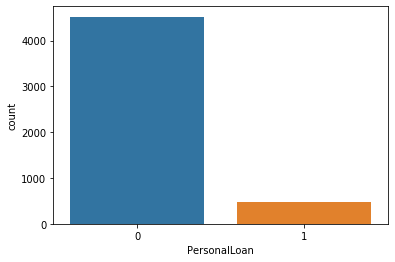

In [9]:
# 범주형 시각화
sns.countplot(bank['PersonalLoan'])

## train / test split

In [12]:
lst = bank.columns.tolist()
lst.remove('PersonalLoan') # list만 쓸 수 있음
lst

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'SecuritiesAccount',
 'CDAccount',
 'Online',
 'CreditCard']

In [13]:
x_data = bank[lst]
y_data = bank['PersonalLoan']
# personalLoan이 중간에 껴있음

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

## 의사결정나무 모델 생성
### sklearn update
### https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [26]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# class_weight : class별 가중치 -> 많은 데이터는 가중치를 적게 주고 적은 데이터는 가중치를 크게, 딱히 좋지는 않음
# criterion : 가지치기 기준
# max_depth (of tree): 최대 깊이 -> 과적합 방지
# max_features : 사용하는 최대 column 개수(auto ,sqrt, log2) # column 많을 때
# max_leaf_node : 최대 leaf 노드의 개수 -> 보통 mean을 많이 적음
# min_samples_split : node를 split할 때 중간 노드에 최소 있어야하는 데이터의 개수
# min_samples_leaf : node를 split할 때 리프 노드에 최소 있어야하는 데이터의 개수
# ccp_alpha : 과적합 방지를 위한 손실함수 parameter : 음수가 아닌 alpha

model = DecisionTreeClassifier(ccp_alpha=0.001)
model

DecisionTreeClassifier(ccp_alpha=0.001)

In [15]:
import sklearn
sklearn.__version__
# pip install --upgrade scikit-learn
# 업데이트 한 이후에는 바꾼 값만 뜨고 디폴트 값이 안뜸

'0.23.1'

In [27]:
# 모델 학습
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001)

In [ ]:
# KNN : 큰 값에 영향, 
# decision tree는 다른 컬럼에 영향 안받아서 scaling 안해줘도 됨

In [28]:
# 예측
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_pred, y_test) # 순서 중요


0.8986666666666666


array([[1348,  152],
       [   0,    0]], dtype=int64)

In [ ]:
# 0의 개수가 많은데 1을 예측을 하나도 못함
# 실제 1중에 예측을 1로 얼마나 했는가?
# 0/152 ... 쓰레기 모델
# accuracy_score가 중요하지 않음

In [25]:
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_pred, y_test)

0.9793333333333333


array([[1342,   25],
       [   6,  127]], dtype=int64)

In [29]:
print(accuracy_score(y_test, y_pred))
confusion_matrix(y_pred, y_test)

0.9846666666666667


array([[1341,   16],
       [   7,  136]], dtype=int64)

In [ ]:
# 6개 포기를 하더라도 대출 안한 사람은 중요하지 않으므로
# 1의 예측 개수가 높아야 좋음 -> ccp_alpha의 중요성
# ccp_alpha가 감소할수록 성능이 좋아지는 것을 볼 수 있음